<div style="text-align: center;">
    <img src="./images/logo_CESI.jpg" width="500">
</div>

# Livrable

## Contexte du Projet

Ce projet vise à répondre à l'appel à manifestation d'intérêt lancé par l'ADEME (Agence de l'Environnement et de la Maîtrise de l'Énergie) pour la réalisation de démonstrateurs et d'expérimentations de nouvelles solutions de mobilité durable adaptées à différents types de territoires.

L'équipe de CesiCDP, en collaboration avec plusieurs partenaires, s'est déjà intéressée à la mobilité multimodale intelligente et souhaite développer une méthode basée sur la recherche opérationnelle pour résoudre le problème de la gestion de tournées de livraison. L'objectif est de calculer une tournée optimisée sur un réseau routier reliant un sous-ensemble de villes, en minimisant la durée totale de la tournée tout en tenant compte du trafic prévu sur chaque axe pour les différentes tranches horaires.

Le projet comporte une version de base du problème où le modèle et le code en Python doivent être développés pour résoudre des instances de taille importante. De plus, une étude statistique du comportement expérimental de l'algorithme doit être réalisée.

Dans un second temps, des contraintes supplémentaires peuvent être intégrées. Ces dernières incluent des fenêtres de temps de livraison, l'interdiction de livrer en dehors de ces fenêtres, la possibilité d'attendre sur place l'ouverture des fenêtres, l'utilisation de plusieurs camions pour effectuer les livraisons avec des contraintes de capacité et d'encombrement, des points de collecte spécifiques pour chaque objet, la variation du temps de parcours des axes en fonction du trafic, etc.

Le projet est organisé en plusieurs étapes, dont la modélisation formelle, la conception algorithmique et l'implémentation, l'étude expérimentale et la présentation des résultats à l'équipe avant la remise des livrables à l'ADEME.

Le premier livrable de modélisation contient une étude décrivant le problème, sa formalisation, les contraintes supplémentaires traitées et une analyse théorique de sa complexité.

## Membre du groupe

<div style="text-align: center;">
<img src="./images/team.png" width="1000">
</div>

# I. Modélisation

## Choix des contraintes et explication  

##### k camions disponibles simultanément pour effectuer les livraisons. Le calcul de la tournée devra inclure l’affectation des objets (et donc des points de livraison) aux différents camions disponibles, et minimiser non plus le temps total, mais la date de retour du dernier camion à la base. 
- Capacité des camions (2 ou 3 dimensions) et encombrement des objets 
- Certains objets ne peuvent être livrés que par certains camions

## Plan d'action 

- Reformulation du contexte 
- Calcul de propriété théorique 
- Calcul de complexité 
- Représentation formelle des données et de l'objectif (Contraintes) 
- Sources

## Contexte
L'ADEME a lancé un appel à manifestation d'intérêt pour promouvoir la réalisation de démonstrateurs et d’expérimentations de nouvelles solutions de mobilité. CesiCDP, en collaboration avec ses partenaires, propose une solution pour optimiser les tournées de livraison.

## Description du Problème de Base
Le problème consiste à calculer une tournée de livraison sur un réseau routier reliant plusieurs villes et revenant au point de départ, en minimisant la durée totale de la tournée. Ce problème est connu sous le nom de Problème du Voyageur de Commerce (TSP).


# Vocabulaire et notion de complexité

## Définition de base

Un graphe est composé de sommets reliés par des arêtes.
Une boucle est une arête reliant un sommet à lui-même.
Deux sommets reliés par une arête sont dit adjacents 
Le degré d'un sommet est le nombre d'arêtes dont ce sommet est une extrémité.
Un sommet qui n'est adjacent à aucun autre sommet du graphe est dit isolé. C'est le cas du sommet E de notre exemple. 

<div style="text-align: center;">
<img src="./images/graph_def.png">
</div>

Un graphe orienté est un graphe dont les arêtes sont orientées. Chaque arête ne peut être parcourue que dans le sens de la flèche.
Les arêtes sont appelées arcs.

<div style="text-align: center;">
<img src="./images/graph_oriente.png">
</div>

Un graphe simple est un graphe ayant au plus une arête entre deux sommets et n’ayant pas de boucle.
Un graphe est dit complet lorsque tous ses sommets sont adjacents 


<div style="text-align: center;">
<img src="./images/graph_comp_non_comp.png">
</div>

- La somme des degrés des sommets d’un graphe non orienté est égale au double du nombre total d’arêtes.

## Chaines 

Une chaîne est une suite de sommets telle que chaque sommet est relié au suivant par une arête.
Dans une chaîne, on peut prendre plusieurs fois la même arête.
La longueur d'une chaîne est le nombre d'arêtes qui la composent.
Une chaîne est fermée lorsque l’origine et l’extrémité sont confondues.

<div style="text-align: center;">
<img src="./images/def_chaine.png">
</div>

## Cycle 

Un cycle est une chaîne  fermée (c'est-à-dire dont l'origine et l'extrémité sont identiques) dont toutes les arêtes sont distinctes.
On dit qu'un graphe est connexe si deux sommets quelconques peuvent être reliés par une chaîne.

### Cycles Eulérien 

Une chaîne est eulérienne lorsqu’elle contient chaque arête du graphe une et une seule fois.
Si cette chaîne est un cycle, il s’agit d’un cycle eulérien
Un graphe connexe contient une chaîne eulérienne si et seulement s'il possède 0 ou 2 sommets de degré impair

## Matrice d'adjacence 

### Graphe non orienté 
La matrice d’adjacence associée à un graphe non orienté d’ordre n dont les sommets sont numérotés de 1 à $n$ est la matrice carrée d’ordre $n$, où le terme situé en ligne $i$ et colonne $j$ est égal au nombre d’arêtes reliant $i$ et $j$.

La matrice d’adjacence d’un graphe non orienté est toujours symétrique par rapport à sa première diagonale.


<div style="text-align: center;">
<img src="./images/Matrice_adj_non_oriente.png">
</div>


### Graphe orienté

La matrice d’adjacence associée à un graphe orienté d’ordre $n$ dont les sommets sont numérotés de 1 à $n$ est la matrice carrée d’ordre $n$, où le terme situé en ligne $i$ et colonne $j$ est égal à 1 s’il existe une arête menant de $i$ à $j$, et à 0 sinon. Contrairement à la matrice d’adjacence d’un graphe non orienté, celle d’un graphe orienté n’est pas forcément symétrique par rapport à sa première diagonale.

<div style="text-align: center;">
<img src="./images/Matrice_adj_oriente.png">
</div>

## Complexité d'un algorithme
La complexité d'un algorithme peut être définie comme la quantité de ressources, telles que le temps d'exécution et l'espace mémoire, utilisées par cet algorithme.

- $ O(1) $ (constante): Toutes les opérations sont simples.
- $ O(log n) $: Ce sont des algorithmes très rapides. Ex : recherche dichotomique.
- $ O(n) $ (on dit linéaire): Typiquement quand on parcourt un tableau ou une liste un nombre borné de fois : recherche dans un tableau, minimum d’une liste, etc.
- $O(n log n)$: Cette complexité apparaît régulièrement lorsque l’on fait du “diviser pour régner”. Ex : tri rapide, tri fusion, tri par tas, etc.
- $O(n^2)$ (on dit quadratique). Quand on manipule des tableaux à deux dimensions, ou qu’on effectue un assez grand nombre de calculs sur un tableau à une dimension : somme de deux matrices, tri insertion, tri bulle, tri sélection, etc.


La notion de "grand O" est utilisée pour caractériser cette complexité. Elle fournit une fonction qui limite asymptotiquement, avec un facteur constant, la fonction qui représente le temps de calcul de l'algorithme en fonction de la taille de l'entrée. Par exemple, si l'on dit que l'algorithme a une complexité de $O(n²)$ dans le pire des cas, cela signifie que l'algorithme prendra au maximum un temps de l'ordre de $x * n² + y$, où x est une constante réelle. La valeur de y peut être une expression polynomiale de degré inférieur à $n²$.



## 1. Reformulation Formelle du Problème
### Variables de Décision
- \($ x_{ijk} $\): Indicateur binaire (1 si l'arc de la ville \($ i $\) à la ville \($ j $\) est utilisé par le camion \($ k $\), 0 sinon)
- \($ t_i $\): Temps d'arrivée à la ville \($ i $\)
- \($ l_k $\): Charge du camion \($ k $\)

### Fonction Objectif
Minimiser la durée totale de la tournée:
\[
$\min \sum_{k=1}^{m} \sum_{i=1}^{n} \sum_{j=1}^{n} c_{ij} x_{ijk}$
\]
où \($ c_{ij} $\) est le coût (temps de trajet) entre les villes \($ i $\) et \($ j $\).

### Contraintes
1. Chaque ville doit être visitée une fois par un camion:
\[
$\sum_{k=1}^{m} \sum_{j=1}^{n} x_{ijk} = 1 \quad \forall i
$\]
2. Chaque camion doit quitter chaque ville qu'il visite:
\[
$\sum_{j=1}^{n} x_{ijk} = \sum_{j=1}^{n} x_{jik} \quad \forall i, \forall k
$\]
3. Contraintes de temps:
\[
$t_i + c_{ij} - t_j \leq M (1 - x_{ijk}) \quad \forall i, j, k
$\]
4. Contraintes de capacité:
\[
$\sum_{i=1}^{n} d_i x_{ijk} \leq Q_k \quad \forall k$
\]
5. Variables binaires:
\[
$x_{ijk} \in \{0, 1\}$
\]


## Description des contraintes

### Contraintes de base

<div style="text-align: center;">
  <img src="./images/OIJ_graph.drawio.png "/>
</div> 

On cherche à calculer la distance minimale entre les villes, afin de minimiser le temps de trajet. On cherche donc à minimiser la fonction suivante :
$$ Coût(total) = \sum temps \ de \ parcours \ (segment) $$
$$ \sum_{i}^{}\sum_{j}^{}x_{ij}\times c_{ij} $$

$$ F(S) = \sum_{i=1}^{n-1} \text{dist}((x_{S_i}, y_{S_i}), (x_{S_{i+1}}, y_{S_{i+1}})) + \text{dist}((x_{S_n}, y_{S_n}), (x_{S_1}, y_{S_1})) $$

Dans cette expression, $S$ est une solution candidate représentée par une séquence ordonnée des indices des points d'intérêt à visiter, $ n $ est le nombre de points d'intérêt, $(x_i, y_i)$ sont les coordonnées cartésiennes du point d'intérêt d'indice $i$, et $\text{dist}((x_i, y_i), (x_j, y_j))$ représente la distance euclidienne entre les points $(x_i, y_i)$ et $(x_j, y_j)$.

Afin de calculer le temps de trajet le plus efficace, nous pouvons utiliser l'algorithme de Dijkstra. Cet algorithme permet de calculer le plus court chemin entre deux sommets d'un graphe. Il est basé sur le principe de relaxation, qui consiste à améliorer progressivement une estimation de la distance d'un sommet à la source. L'algorithme de Dijkstra est un algorithme glouton, c'est-à-dire qu'il choisit à chaque étape le sommet qui a la distance la plus faible parmi les sommets non visités. Il est nécessaire de parcourir tous les sommets du graphe pour trouver le plus court chemin entre deux sommets.
Cependant, le rapport entre le temps d'exécution et la taille du graphe est de $O(n²)$, ce qui est trop long pour des graphes de grande taille. Il est donc nécessaire d'utiliser d'autres manières de trouver cet optimal : les heuristiques.

#### On ne peut livrer le client 2 avant de livrer le client 1 

<div style="text-align: center;">
  <img src="./images/OIJ_graph.drawio.png" />
</div>



Nous allons poser notre point de départ au point O. Il s'agit tout d'abord de s'assurer que le camion part du dépôt. On pose donc un booléen pour savoir si le camion s'est déplacé. La valeur est de 0 si le camion n'a pas parcouru l'arête et 1 si l'arrête est parcourue. 

Soit : $ \sum^{}x_{oi} =1 $
et  $ \sum^{}x_{oj} =1 $



$t_i + c_{ij} - N(1 - x_{ij}) \leq t_j$

Avec $t_i$ le temps de passage au sommet $i$, $c_{ij}$ le temps de parcours entre les sommets $i$ et $j$, $N$ une constante suffisamment grande et $x_{ij}$ un booléen valant 1 si le sommet $j$ est visité après le sommet $i$ et 0 sinon.
Cette équation permet de s'assurer que le sommet $j$ n'est visité qu'après le sommet $i$. En effet, si $x_{ij}$ vaut 0, alors $N(1 - x_{ij})$ vaut $N$ et l'équation devient $t_i + c_{ij} - N \leq t_j$. Comme N est une constante suffisamment grande, cette équation est toujours vérifiée. Si $x_{ij}$ vaut 1, alors $N(1 - x_{ij})$ vaut 0 et l'équation devient $t_i + c_{ij} \leq t_j$, ce qui est équivalent à $t_i + c_{ij} - t_j \leq 0$. Cette équation est vérifiée si le sommet $j$ est visité après le sommet $i$.

#### Puisque nous sommes dans un cycle hamiltonien, notre problème ne peut pas contenir de boucle :

En posant la même base que le problème précédent, on sait que nous ne pouvons passer deux fois au même endroit de sorte que : 

<div style="text-align: center;">
  <img src="./images/Not_boucle.png" />
</div>

De ce fait, on pose : $ \sum^{}x_{ii} = 0 $ 




### Contraintes Supplémentaires
####  k camions disponibles simultanément pour effectuer les livraisons. Le calcul de la tournée devra inclure l’affectation des objets (et donc des points de livraison) aux différents camions disponibles, et minimiser non plus le temps total, mais la date de retour du dernier camion à la base.

Une des autres contraintes supplémentaires de notre problème de gestion de tournées de livraison concerne l’ajout de plusieurs camions permettant d’effectuer en même temps les livraisons.

Cette contrainte contient également plusieurs aspects à prendre en compte :
* Le calcul de la tournée devra inclure l’affectation des objets aux différents camions disponibles
* Minimiser non plus le temps total, mais la date de retour du dernier camion à la base

Soit $n$ le nombre d’objets à livrer, $k$ le nombre de camions disponibles simultanément et $W$ la capacité maximale de chaque camion.
Nous avons donc comme variables de décision les suivantes :
* $x[i,j]$ : variable binaire indiquant si l’objet $i$ est affecté au camion $j$ ($x[i,j]=1$) ou non ($x[i,j]=0$).

Les contraintes sont les suivantes :
1.	Chaque objet doit être affecté à un seul camion :<br/>
<br/>

$\sum_{j=1}^{k}x[i,j]=1$, $\forall j \in {1, 2, …, k}$
 
2.	Chaque camion ne peut pas dépasser sa capacité maximale :<br/>
<br/>

$\sum_{i=1}^{n}w[i] \cdots x[i,j] \leq W$, $\forall j \in {1, 2, …, k}$

3.	Les contraintes de fenêtre de temps : Si l’objet $i$ est affecté au camion $j$, il doit être livré dans la fenêtre de temps définie pour ce camion : <br/>
<br/>
$t_{départ ,j}$ $+$ temps de trajet $(j)$ $\leq$ heure de début de livraison $(i)$ $\leq$ heure de fin de livraison $(i)$ $\leq$ $t_{retour, j}$

Où $t_{départ ,j}$ est l’heure de départ du camion $j$, temps de trajet $(j)$ est le temps de trajet nécessaire pour atteindre l’objet $i$, heure de début de livraison $(i)$ est l’heure de début de la fenêtre de temps de l’objet $i$, heure de fin de livraison $(i)$ est l’heure de fin de la fenêtre de temps de l’objet $i$ et $t_{retour, j}$ est l’heure de retour du camion $j$ à la base.

L’objectif consiste à minimiser la date de retour du dernier camion à la base. Cela peut être formulé comme suit :

4.	Objectif : Minimiser la date de retour du dernier camion à la base :
<br/>
<br/>
Minimiser $max_{j}$ $t_{retour, j}$



### Analyse supplémentaire des contraintes non implémentée

Nous avons décidé d'analyser tout de même les contraintes que nous n'implémenterons pas.

#### Le temps de parcours d’une arête varie au cours du temps (ce qui revient à faire varier sa longueur), pour représenter la variation du trafic

Différentes variations de temps découlent de cette contrainte :

- Les aléas de la circulation (tels que les accidents, les travaux, les embouteillages...) peuvent augmenter le temps de trajet d'un segment. Ces variations peuvent se calculer par la multiplication du temps de trajet par un coefficient de variation :
 
$temps_{variation} = temps_{trajet} * coefficient_{variation}$

$temps_{variation}$ représente le temps de trajet avec les aléas de la circulation

$temps_{trajet}$ représente le temps de trajet sans les aléas de la circulation

$coefficient_{variation}$ représente le coefficient de variation du temps de trajet, qui dépend des aléas de la circulation

Exemple : Si le temps de trajet entre deux villes est de 10 minutes et que le coefficient de variation est de 1.5 à cause d'un accident, alors le temps de trajet sera de 15 minutes.
Ces éléments sont majoritairement aléatoires, mais certains peuvent être prévus à l'avance, comme les travaux ou les bouchons à certaines horaires dans certains secteurs (comme autour d'une grande ville). Il est donc possible de les prendre en compte dans le calcul du temps de trajet.

- La météo peut également influencer le temps de trajet. Par exemple, si le temps est pluvieux, le temps de trajet peut être augmenté de 10% par rapport à un temps sec. On peut donc calculer le temps de trajet en multipliant le temps de trajet par un coefficient de variation : 

$temps_{variation} = temps_{trajet} * coefficient_{variation}$

$temps_{variation}$ représente le temps de trajet avec la météo

$temps_{trajet}$ représente le temps de trajet sans la météo

$coefficient_{variation}$ représente le coefficient de variation du temps de trajet, qui dépend de la météo

Ceci est similaire à la variation du temps de trajet due à la circulation, mais le coefficient de variation est différent.

- La limitation de vitesse en fonction du type de route. Par exemple, sur une autoroute, la vitesse maximale est de 130 km/h, alors que sur une route nationale, la vitesse maximale est de 80 km/h. On peut donc calculer le temps de trajet en divisant la distance par la vitesse maximale autorisée : 

$temps_{trajet} = distance / vitesse_{max}$

$temps_{trajet}$ représente le temps de trajet sur un segment

$distance$ représente la distance entre deux villes

$vitesse_{max}$ représente la vitesse maximale autorisée sur la route

#### Chaque objet a un point de collecte spécifique

Modélisation du problème :

Variables de décision du programme :

$S_{supp}$ : nombre de sommets supplémentaires

$t_{supp}$ : temps supplémentaire, dû à la période de chargement

$t_{tournée}$ : temps total de la tournée

Contraintes du programme :
Chaque objet a un point de collecte spécifique

Fonction économique

• Ajout du nombre de points de collecte au nombre total d’arrêt :
$S_{total}$ + $S_{supp}$ 

• Ajout de temps à la durée totale de la tournée dû au temps nécessaire au chargement des objets
$t_{total}$ + $t_{supp}$ = $t_{tournée}$


#### Interdiction de livrer hors de la fenêtre

Une des contraintes supplémentaires du problème de gestion de tournées de livraison concerne l'interdiction de livrer en dehors d'une fenêtre de temps spécifiée pour chaque client. Cette contrainte vise à garantir que les livraisons sont effectuées pendant des plages horaires prédéterminées et ne peuvent pas être réalisées en dehors de ces intervalles.

Pour exprimer correctement cette contrainte, nous devons tenir compte de deux aspects :

1. Le temps de livraison doit commencer après le début de la fenêtre de temps du client.
2. Le temps de livraison ne doit pas dépasser la fin de la fenêtre de temps du client.

Nous pouvons représenter cette contrainte en associant à chaque client un intervalle de temps pendant lequel la livraison peut être effectuée. 

Soit $t_i^{\text{début}}$ et $t_i^{\text{fin}}$ les instants de début et de fin de la fenêtre de temps du client $i$ respectivement et $L_i$, l'heure à laquelle la livraison $i$ est effectuée. Pour chaque client, le temps de livraison est calculé en tenant compte du temps de trajet depuis la livraison précédente, ainsi que du temps nécessaire pour remettre le colis.

Supposons que nous ayons déjà calculé le temps de livraison jusqu'au client précédent $j$ et notons ce temps $T_j$. Le temps de livraison au client actuel $i$ peut être exprimé comme suit :

$$
\forall L_i: \ t_{\text{début},i} \leq T_j + \text{temps de trajet}(j, i) + \text{temps de remise du colis} \leq t_{\text{fin},i}
$$

Cette contrainte garantit que l'heure de livraison de chaque objet se situe dans la plage spécifiée par la fenêtre de temps correspondante. Si une livraison est effectuée avant l'heure de début ou après l'heure de fin de sa fenêtre de temps, la contrainte sera violée.

L'introduction de cette contrainte peut rendre la résolution du problème plus complexe, car il faut prendre en compte les fenêtres de temps lors de la planification des tournées de livraison. Cela va nécessiter des ajustements dans l'algorithme utilisé pour trouver le chemin le plus court. Des considérations supplémentaires doivent être prises en compte pour s'assurer que les livraisons sont effectuées dans les plages horaires spécifiées, ce qui peut influencer la sélection des chemins optimaux.


### 2. Propriétés Théoriques du Problème
Nous cherchons à démontrer que le Problème du Voyeageur de commerce (TSP) appartient à la classe des problèmes NP-complets. Cette démonstration se fait en deux étapes : premièrement, en montrant que le TSP est dans NP, et deuxièmement, en prouvant qu'il est NP-difficile.

La différence entre un problème NP-complet et NP-difficile réside dans le fait que prouver la solvabilité dans NP-complet équivaut à prouver la solvabilité dans NP-difficile.

<div style="text-align: center;">
    <img src="./images/NPcomplet.png">
</div>


Pour établir que le TSP est dans NP, nous devons vérifier que la solution peut être obtenue en temps polynomial (c'est-à-dire que le nombre d'opérations nécessaires est proportionnel à la taille de la solution candidate 
𝑂
(
𝑛
2
)
O(n 
2
 )) et qu'elle peut être vérifiée par un certificat.

Dans ce contexte, le temps polynomial est caractérisé par la présence d'un cycle passant par chaque sommet et d'un coût inférieur à une valeur 
𝑘
k.



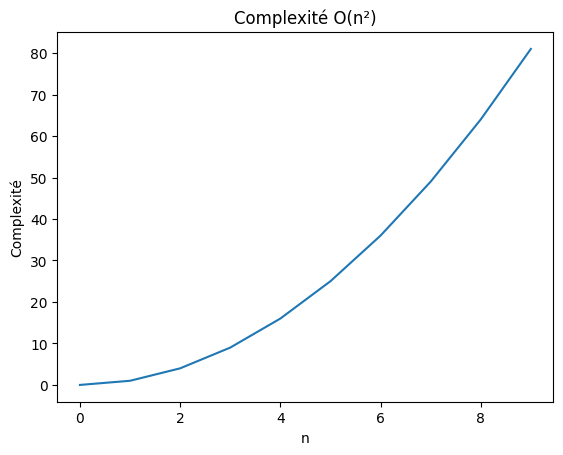

In [1]:
import matplotlib.pyplot as plt

def plot_linear_complexity(n):
    x = range(n)
    y = [i**2 for i in x]
    
    plt.plot(x, y)
    plt.xlabel('n')
    plt.ylabel('Complexité')
    plt.title('Complexité O(n²)')
    plt.show()

# Exemple d'utilisation avec n = 10
plot_linear_complexity(10)


Cette complexité est quadratique. On utilise les $n$ sommets formant un cycle, puis le coût de ce cycle (la somme du coût de chacune des arêtes du composant).

Pour le problème de la gestion de tournées de livraison, le certificat peut être une séquence ordonnée de villes représentant l'ordre des livraisons. Pour vérifier si cette séquence est correcte, nous pouvons parcourir la séquence en vérifiant que chaque ville est reliée à la précédente par une arête valide.


La complexité temporelle est un terme utilisé pour décrire l'évolution du temps de calcul en fonction de la taille du problème.
### Preuve de l'appartenance à NP-Complet

### a. Montrer que le TSP est dans NP

Pour prouver que le TSP est NP-complet, nous allons le réduire au problème du VRP (Vehicle Routing Problem), qui est un autre problème d'optimisation combinatoire NP-hard.


On pose :
- un graph pondéré

Données :

- Un graphe complet pondéré G = (V, E), où V représente l'ensemble des villes et E représente l'ensemble des arêtes reliant les villes.
- Une fonction de coût positive C : E → ℕ qui attribue un coût à chaque arête du graphe G.

Objectif :

- Trouver un cycle hamiltonien de coût minimum, c'est-à-dire un chemin qui passe par chaque ville une fois et revient à la ville de départ, tout en minimisant la somme des coûts des arêtes parcourues.



## Preuve de l'appartenance a NP et certificat 

Ce problème appartient à $NP$ car il possède un cycle et on peut vérifier en temps polynomial si :
-  le cycle passe par chaque sommet exactement une fois
-  son coût est inférieur à $ k $


Certificat de vérification pour le problème du VRP:

Dans le contexte du VRP, un certificat est une proposition d'itinéraire, sous la forme d'une permutation des villes, illustrant un cycle hamiltonien. Pour un ensemble de n villes, ce certificat se présente comme une séquence ordonnée de longueur n qui indique la succession dans laquelle les villes sont visitées. Par exemple, pour un problème avec 5 villes, un certificat pourrait être la séquence [2, 5, 1, 3, 4].

Dans le problème du Voyageur de commerce (VRP), il est essentiel de s'assurer que la solution proposée satisfait deux critères clés: la visite unique de chaque ville et le respect de la contrainte de coût. Analysons ces deux critères en détail.

Visite unique de chaque ville:

   a. Objectif: Garantir que chaque ville est visitée exactement une fois.

   b. Méthode: Parcourir la séquence du certificat et vérifier que chaque ville n'apparaît qu'une seule fois.

   Soit un graphe complet $G = (V, V \times V )$ muni d’une fonction de coût positive $C : V \times V → N$ sur les arêtes, respectant l’inégalité triangulaire et un entier $k$.
  Nous cherchons à savoir s’il existe un cycle passant par chaque sommet exactement une fois et ayant un coût inférieur à $k$.

   L'inégalité triangulaire est le fait que, dans un triangle (ou tout triplet de sommet), la longueur d'un côté est inférieure à la somme des longueurs des deux autres côtés.
Dans le cadre des graphes, si on a un graphe $G = (V, E)$ et une fonction de distance $d$ : $E \rightarrow R$, alors pour tout triplet de sommet $(u, v, w)$ de $V$, on a $d(u, w)  \le d(u, v) + d(v, w)$

(voir schéma ci-dessous : les valeurs sont générées aléatoirement).

<div style="text-align: center;">
    <img src="./images/schemaTriangle.png">
</div>

Nous avons le problème suivant :


Le problème voyageur de commerce a une métrique respectant l’inégalité triangulaire et est dans $NP$ car étant donné un cycle, on peut vérifier en temps polynomial si :
-    Le cycle passe par chaque sommet exactement une fois
-    Son coût est inférieur à $k$.


### b. Réduction polynomiale à partir du problème du cycle Hamiltonien

Pour montrer que le TSP est NP-complet, nous devons montrer qu'un problème déjà connu comme NP-complet peut être réduit au TSP en temps polynomial. Nous allons utiliser le problème du cycle Hamiltonien pour cette réduction.

**Définition du problème du cycle Hamiltonien :**
- **Entrée** : Un graphe \($ G = (V, E) $\).
- **Question** : Existe-t-il un cycle passant par chaque sommet exactement une fois (cycle hamiltonien) ?

**Transformation du problème du cycle Hamiltonien en TSP :**
- Soit une instance \($ I = (G) $\) du problème du cycle Hamiltonien.
- Nous transformons cette instance en une instance \( I' \) du TSP de la manière suivante :
  - Nous fixons \($ k = |V| $\).
  - Nous construisons un graphe complet \($ K = (V, V \times V) $\) avec une fonction de coût \($ C $\) définie comme suit :
    - \($ C(u, v) = 1 $\) si \($ (u, v) \in E $\).
    - \($ C(u, v) = 2 $\) si \($ (u, v) \notin E $\).

**Vérification de la réduction :**
- Si le graphe \($ G $\) a un cycle Hamiltonien, alors dans le graphe \($ K $\), il y a un cycle de coût \($ |V| $\) utilisant uniquement les arêtes de coût 1.
- Si le graphe \($ G $\) n'a pas de cycle Hamiltonien, alors tout cycle dans \($ K $\) aura au moins une arête de coût 2, rendant le coût total strictement supérieur à \($ |V| $\).

Cette réduction se fait en temps polynomial, car :
- Copier le graphe \($ G $\) et ajouter les arêtes supplémentaires prend \($ O(|V|^2) $\).
- Construire la fonction de coût \($ C $\) prend \($ O(|V|^2) $\).


En suivant ces étapes, nous avons montré que :
1. Le TSP est dans NP, car il est possible de vérifier un certificat en temps polynomial.
2. Le problème du cycle Hamiltonien peut être réduit au TSP en temps polynomial.

Ainsi, le problème du TSP est NP-complet.

### c. Prouver que le TSP est NP-difficile

Pour montrer que le TSP est NP-difficile, nous devons démontrer qu'il est au moins aussi difficile que tout autre problème dans NP. Nous allons le faire en montrant qu'une instance du TSP peut être utilisée pour résoudre le VRP (Vehicle Routing Problem), qui est un problème également connu pour être difficile.

#### Transformation du TSP en VRP

Soit \($ T $\) une instance du TSP avec un ensemble de \($ n $\) villes. Nous supposons que \($ T $\) a une solution optimale qui forme un cycle hamiltonien de coût minimum. Nous construisons une instance \($ V $\) du VRP en utilisant les mêmes \($ n $\) villes que dans \($ T $\). Chaque ville dans \($ V $\) représente un point de livraison.

#### Définition des paramètres du VRP

- **Ensembles :**
  - \($ V $\) : ensemble des \($ n $\) villes (points de livraison).
  - \($ D $\) : ensemble des dépôts (un seul dépôt central).
  - \($ C $\) : ensemble des véhicules disponibles pour la livraison.

- **Coûts :**
  - Coût des arcs : Chaque arc \($ (u, v) $\) dans \($ V $\) a un coût égal à la distance entre les villes correspondantes dans \($ T $\).
  - Coût des véhicules : Chaque véhicule dans \($ C $\) a une capacité et une contrainte de temps suffisamment grandes pour permettre la visite de toutes les villes.

#### Vérification de la réduction

- Si nous pouvons résoudre le VRP pour l'instance \($ V $\), alors nous pouvons obtenir une solution au TSP pour l'instance \($ T $\).
- Supposons que nous ayons une solution optimale pour le VRP qui consiste en un ensemble de tournées de véhicules. Chaque tournée de véhicule visite un sous-ensemble de villes de \($ V $\) dans un ordre spécifique.
- En regroupant les sous-ensembles de villes visitées dans l'ordre de visite des tournées de véhicules, nous obtenons une séquence ordonnée de toutes les villes, formant un cycle qui passe une fois par toutes les villes de \($ T $\) et revient à son point de départ. Le coût total de ce cycle correspond à la distance totale parcourue dans le VRP.

Ainsi, si l'on résout le TSP dans \($ T $\), on peut réduire polynomialement pour résoudre le VRP.



La transformation se fait en temps polynomial, car nous avons effectué les opérations suivantes :
  - Copié le graphe et ajouté des arêtes en un maximum de \($ O(|V|^2) $\) opérations.
  - Construit la fonction de coût en \($ O(|V|^2) $\) opérations.
Enfin, notre problème étant au moins aussi difficile que le cycle Hamiltonien (qui est NP-complet), cela signifie que notre problème est également NP-complet et donc NP-difficile.

## 3. Méthode de Résolution Choisie
### Introduction aux Métaheuristiques
Les métaheuristiques sont des approches d'optimisation qui fournissent des solutions approximatives à des problèmes complexes en un temps raisonnable. Nous avons choisi d'utiliser la Métaheuristique des Fourmis (ACO) pour résoudre le CVRP (Capacitated Vehicle Routing Problem).

### Métaheuristique des Fourmis (ACO)
L'une des méthodes de résolution de ce problème est l'utilisation de l'algorithme des colonies de fourmis (ACO). L'algorithme ACO utilise des fourmis artificielles pour explorer l’espace. Chaque fois qu'une fourmi passe sur une arête, elle laisse des phéromones sur celle-ci. En admettant que les fourmis privilégient le chemin avec le plus de phéromone, on peut construire progressivement le chemin le plus optimal en observant le taux de phéromone sur les arêtes du graphe.

Nous avons choisi d'utiliser dans un premier temps cette métaheuristique pour résoudre le problème du CVRP en raison de sa capacité à trouver des solutions proches de l'optimum global avec un temps d'exécution acceptable. De plus, cette métaheuristique nous permet également de résoudre les contraintes supplémentaires que nous ajouterons dans une version complémentaire.


## Approche pour modéliser la livraison 

Pour modéliser la livraison dans le problème du CVRP, on utilisera la capacité des camions pour déterminer le nombre de camions nécessaires pour effectuer la tournée. On effectue un premier l'algorithme (Ant) pour effectuer un premier trajet. Ensuite, les villes sont regroupées en sous-ensembles (clusters) en fonction de la capacité maximale des camions, en veillant à ce que la somme des livraisons nécessaires dans chaque ville ne dépasse pas la capacité maximale du camion. Chacun de ses clusters représentera un camion et une tournée.

Sur chacun de ses clusters, nous exécutons la métaheuristique du recuit, nous permettant d'optimiser encore plus chaque livraison, puisque cet algorithme à de meilleur temps d'exécution malgré ses résultats moins optimaux. Il est ainsi utilisé pour déterminer la séquence optimale de livraison pour chaque camion. En sachant que nous utilisons cet métaheuristique sur un trajet déjà produit avec ACO, le résultat de la tournée tend vers l'optimal.

# II. Implémentation

Les implémentations de la méthode des colonies de fourmis pour le problème du voyageur de commerce avec et sans capacité sont disponibles dans les fichiers Python du dossier. Dans la partie suivante, nous allons procéder aux études expérimentales pour évaluer la performance de cette métaheuristique en comparaison avec d'autres approches possibles.

# III. Plan d'expérimentation

## 1ère version de notre algorithme

Comme mentionné précédemment, un graphe complet est un graphe dans lequel tous les sommets sont connectés entre eux, alors que les sommets d'un graphe non complet possèdent un nombre non nul de voisins. 

Pour mieux refléter une situation réaliste, nous avons implémenté une version de l'algorithme des fourmis capable de s'adapter à un graphe non complet généré aléatoirement. Plusieurs points méritent d'être soulignés :
-  À chaque déplacement d'une fourmi vers un sommet, le choix du prochain sommet se fait uniquement parmi les voisins du sommet actuel.
- Les fourmis ne sont pas contraintes de passer une seule fois par chaque sommet, car elles risqueraient de se retrouver bloquées si tous les voisins ont déjà été visités.
- Les fourmis doivent revenir au point de départ.

Voici un exemple de résolution par l'algorithme des fourmis sur un graphe non complet de 6 villes généré aléatoirement (6 villes, 6 fourmis, 250 itérations).

<div style="text-align: center;">
    <img src="./images/6villes_250itérations.png">
</div>


Les chemins possibles, reliant deux sommets voisins, sont indiqués en orange, tandis que le chemin le plus court trouvé par l'algorithme est en noir. Le sommet 0, qui est le point de départ et de retour, est marqué en rouge.

Le meilleur chemin trouvé par les fourmis est : $[0, 2, 3, 1, 4, 5, 0]$, il passe par 7 villes. On observe que ce chemin respecte bien les connexions disponibles, évitant spécifiquement les arêtes $[3, 5]$ , $[0, 3]$ , $[2, 5]$ , $[1, 5]$ et $[1, 2]$ avec le poids le plus élevé pour trouver la solution optimale.

Nous n'avons pas interdit aux fourmis de revisiter un sommet déjà visité en l'absence d'autres solutions plus courtes, mais nous les avons dissuadées en ajustant les phéromones. Si une fourmi repasse par un sommet déjà visité, la quantité de phéromones déposée sur l'arête est divisée par 10, réduisant ainsi la probabilité qu'une autre fourmi emprunte le même chemin.

Le fait que le graphe soit non complet implique que chaque fourmi doit d'abord examiner les voisins directs du sommet actuel. Cette contrainte ralentit considérablement l'algorithme par rapport à un graphe complet.

### Données utilisées pour le test

Dans le cadre de notre étude sur les performances de l'algorithme utilisé, nous avons choisi de réaliser des tests sur des instances de taille variée, comprenant 10, 20 et 50 villes. Pour chacun de ces tests, nous avons utilisé 5 fourmis et réalisé 1000 itérations, afin de simuler une "grande instance" de calcul. Les résultats obtenus montrent une augmentation exponentielle du temps de calcul avec l'augmentation du nombre de villes, nécessitant respectivement 17 secondes pour 10 villes, 158 secondes pour 20 villes et 2340 secondes pour 50 villes.

<div style="text-align: center;">
    <img src="./images/10villes_1000itérations-1.png">
</div>

<div style="text-align: center;">
    <img src="./images/20villes_1000itérations-1.png">
</div>

<div style="text-align: center;">
    <img src="./images/50villes_1000itérations-1.png">
</div>

Nous avions initialement envisagé d'étendre ces tests à des instances plus grandes, incluant jusqu'à 500 et 1000 villes. Cependant, les estimations préliminaires du temps de traitement, respectivement de 27 jours pour 500 villes et de 108 jours pour 1000 villes, ont rendu ces tests impraticables dans le cadre de notre projet. Bien que le programme fournisse des estimations précises du temps nécessaire à l'avance, les contraintes temporelles associées à de telles durées étaient incompatibles avec les délais de notre étude.

#### Résultats obtenus

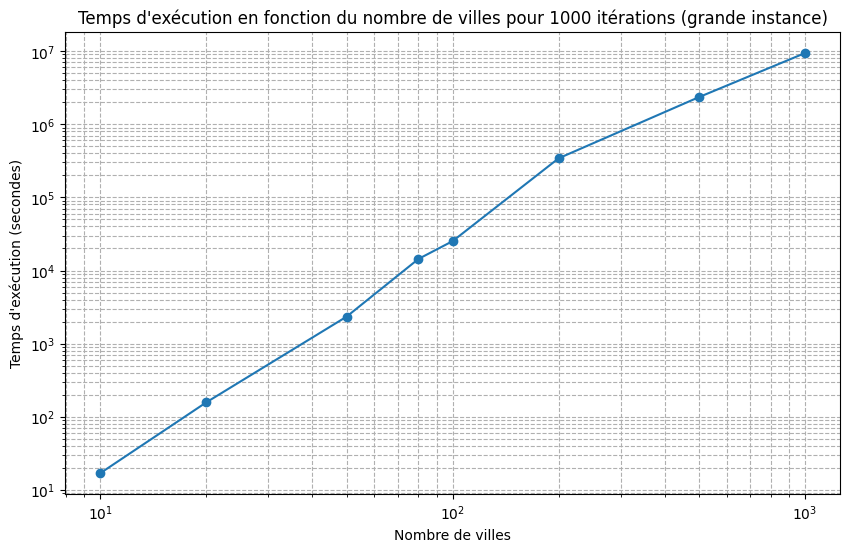

In [2]:
import matplotlib.pyplot as plt

# Données d'entrée
villes = [10, 20, 50, 80, 100, 200, 500, 1000]
temps_execution = [17, 158, 2340, 14400, 25200, 342000, 2340000, 9360000]

# Création du graphique
plt.figure(figsize=(10, 6))
plt.plot(villes, temps_execution, marker='o')

# Titre et étiquettes des axes
plt.title('Temps d\'exécution en fonction du nombre de villes pour 1000 itérations (grande instance)')
plt.xlabel('Nombre de villes')
plt.ylabel('Temps d\'exécution (secondes)')

# Utilisation d'échelle logarithmique pour mieux visualiser les données
plt.yscale('log')
plt.xscale('log')

# Ajout d'une grille pour une meilleure lisibilité
plt.grid(True, which="both", ls="--")

# Affichage du graphique
plt.show()

### Comportement moyen de l'algorithme sur une même instance



#### Données utilisées pour le test


1. **Moyenne (Mean)** :
   $$
   \text{Moyenne} = \frac{17 + 158 + 2340 + 14400 + 25200 + 342000 + 2340000 + 9360000}{8} = 1486389.375
   $$

2. **Médiane (Median)** :
   Les valeurs triées sont : $[17, 158, 2340, 14400, 25200, 342000, 2340000, 9360000]$.
   La médiane sera la moyenne des 4ème et 5ème éléments :
   $$
   \text{Médiane} = \frac{14400 + 25200}{2} = 19800
   $$

3. **Minimum (Min)** :
   $$
   \text{Minimum} = 17
   $$

4. **Maximum (Max)** :
   $$
   \text{Maximum} = 9360000
   $$

5. **Écart type (Standard Deviation)** :
   $$
   \text{Écart type} = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2}
   $$
   Où $N$ est le nombre de valeurs (8), $x_i$ est chaque valeur individuelle, et $\mu$ est la moyenne.

   Calculons cela étape par étape :
   $$
   \mu = 1486389.375
   $$
   Les écarts carrés :
   $$
   (17 - 1486389.375)^2 = 2.2092 \times 10^{12}
   $$
   $$
   (158 - 1486389.375)^2 = 2.2091 \times 10^{12}
   $$
   $$
   (2340 - 1486389.375)^2 = 2.2040 \times 10^{12}
   $$
   $$
   (14400 - 1486389.375)^2 = 2.0148 \times 10^{12}
   $$
   $$
   (25200 - 1486389.375)^2 = 2.1371 \times 10^{12}
   $$
   $$
   (342000 - 1486389.375)^2 = 1.3118 \times 10^{12}
   $$
   $$
   (2340000 - 1486389.375)^2 = 7.2781 \times 10^{11}
   $$
   $$
   (9360000 - 1486389.375)^2 = 6.1972 \times 10^{13}
   $$
   La somme de ces écarts carrés :
   $$
   2.2092 \times 10^{12} + 2.2091 \times 10^{12} + 2.2040 \times 10^{12} + 2.0148 \times 10^{12} + 2.1371 \times 10^{12} + 1.3118 \times 10^{12} + 7.2781 \times 10^{11} + 6.1972 \times 10^{13} = 7.8185 \times 10^{13}
   $$
   Divisez par $N$ (8) et prenez la racine carrée :
   $$
   \text{Variance} = \frac{7.8185 \times 10^{13}}{8} = 9.7731 \times 10^{12}
   $$
   $$
   \text{Écart type} = \sqrt{9.7731 \times 10^{12}} = 3.1271 \times 10^6 = 3127135.24
   $$

#### Résultats et Interprétation

Les résultats des calculs sont les suivants :

- **Moyenne** : 1486389.375 secondes
- **Médiane** : 19800 secondes
- **Minimum** : 17 secondes
- **Maximum** : 9360000 secondes
- **Écart type** : 3127135.24 secondes

Ces statistiques montrent une grande dispersion des temps d'exécution. La moyenne est fortement influencée par les valeurs très élevées (les instances de 500 et 1000 villes). Cela se voit également dans l'écart type très élevé, ce qui indique une variation significative autour de la moyenne.

La médiane, étant beaucoup plus basse que la moyenne, montre que la majorité des temps d'exécution sont inférieurs à la moyenne, mais quelques valeurs très élevées (outliers) augmentent la moyenne de manière significative. Cela indique que le temps d'exécution augmente de manière exponentielle avec le nombre de villes.

Le minimum (17 secondes) et le maximum (9360000 secondes) illustrent l'ampleur de cette variation. En résumé, les résultats montrent clairement que le temps d'exécution augmente rapidement avec l'augmentation du nombre de villes, rendant les calculs impraticables pour des instances très grandes sans optimisation supplémentaire ou une capacité de calcul beaucoup plus élevée.



### Analyse des résultats
L'analyse statistique de l'algorithme de la colonie de fourmis permet d'évaluer les performances des différents paramètres de l'algorithme. Pour ce faire, on utilise des mesures nommées l'optimum global et l'optimum local.

### Optimum local et global
##### Optimum Local
Selon "Introduction to Optimization" d'Edwin K. P. Chong et Stanislaw H. Zak, un minimum local dans un algorithme d'optimisation est la valeur la plus basse de la fonction objectif dans une zone spécifique de l'espace de recherche. Il représente une solution qui est optimale par rapport à son voisinage immédiat, mais pas nécessairement à l'échelle globale.

Un minimum local est une solution dont la valeur est inférieure à celles de ses voisins immédiats, sans être la meilleure solution globale. Cela signifie qu'il pourrait exister d'autres solutions avec des valeurs plus basses ailleurs dans l'espace de recherche, mais qui ne sont pas accessibles depuis le minimum local en raison de la structure de l'espace de recherche ou des mécanismes de recherche de l'algorithme.

##### Optimum Global
Selon "Introduction to Algorithms" de Thomas H. Cormen, Charles E. Leiserson, Ronald L. Rivest, et Clifford Stein, l'optimum global dans un algorithme correspond à la solution la plus avantageuse ou la valeur optimale de la fonction objectif que l'algorithme cherche à optimiser parmi toutes les solutions possibles dans l'espace de recherche.

L'optimum global est la solution qui minimise ou maximise la fonction objectif à l'échelle globale, sans être limitée par les optimums locaux ou les solutions intermédiaires. C'est le résultat le plus favorable et le plus efficace que l'algorithme vise à atteindre.

<div style="text-align: center;">
    <img src="./images/Local-Global-Optimum.png">
</div>

### Application à notre problème
L'optimum global représente la meilleure solution trouvée par l'algorithme sur l'ensemble de ses itérations. Pour le problème du VRP, cela signifie le parcours optimal des véhicules. Plus le nombre d'itérations est élevé, plus l'algorithme a de chances de converger vers cet optimum global. En augmentant les itérations, l'algorithme explore davantage de solutions potentielles, ce qui améliore progressivement la qualité de l'optimum global. Cependant, cette augmentation se traduit également par un temps de traitement plus long.

L'optimum local est la meilleure solution trouvée à chaque itération de l'algorithme. C'est une solution provisoire et peut changer d'une itération à l'autre en fonction des choix faits par les fourmis et des phéromones déposées. Les optimums locaux peuvent varier, car l'algorithme explore différentes parties de l'espace de recherche à chaque itération.

Le nombre de fourmis influencera également les performances de l'algorithme de la colonie de fourmis. En augmentant le nombre de fourmis, l'algorithme peut effectuer une recherche plus diversifiée, augmentant ainsi la probabilité de découvrir de meilleurs optimums locaux. Cependant, comme pour l'augmentation des itérations, plus de fourmis signifie un temps de traitement plus long, car chaque fourmi doit prendre des décisions et mettre à jour les niveaux de phéromones.

### Paramètres de l'algorithme des fourmis

Dans les algorithmes de colonies de fourmis (ACO), les paramètres alpha (α) et beta (β) jouent un rôle crucial dans le choix des chemins empruntés par les fourmis. Voici une explication détaillée de leur impact :

- **Paramètre Alpha (α) :**
Une valeur élevée de α accroît l'importance des phéromones dans le processus de décision des fourmis. Cela signifie que les fourmis sont plus susceptibles de suivre des chemins déjà empruntés par d'autres, favorisant l'exploitation des chemins ayant une forte concentration de phéromones.
À l'inverse, une valeur faible de α encourage les fourmis à explorer de nouveaux chemins, car l'influence des phéromones est réduite.

- **Paramètre Beta (β)**
Le paramètre β régule l'importance de l'heuristique, qui inclut des informations supplémentaires sur la qualité des chemins, comme la distance euclidienne entre les villes. Une valeur élevée de β donne plus de poids à cette heuristique, poussant les fourmis à choisir les chemins les plus courts selon l'heuristique. Une valeur faible de β accorde plus d'importance aux phéromones que à l'heuristique, augmentant ainsi la probabilité que les fourmis suivent les traces de phéromones plutôt que de se baser uniquement sur des critères heuristiques.

Pour mieux comprendre l'influence de α et β, nous avons tracé des courbes montrant leur impact sur la qualité de la solution au fil des itérations.

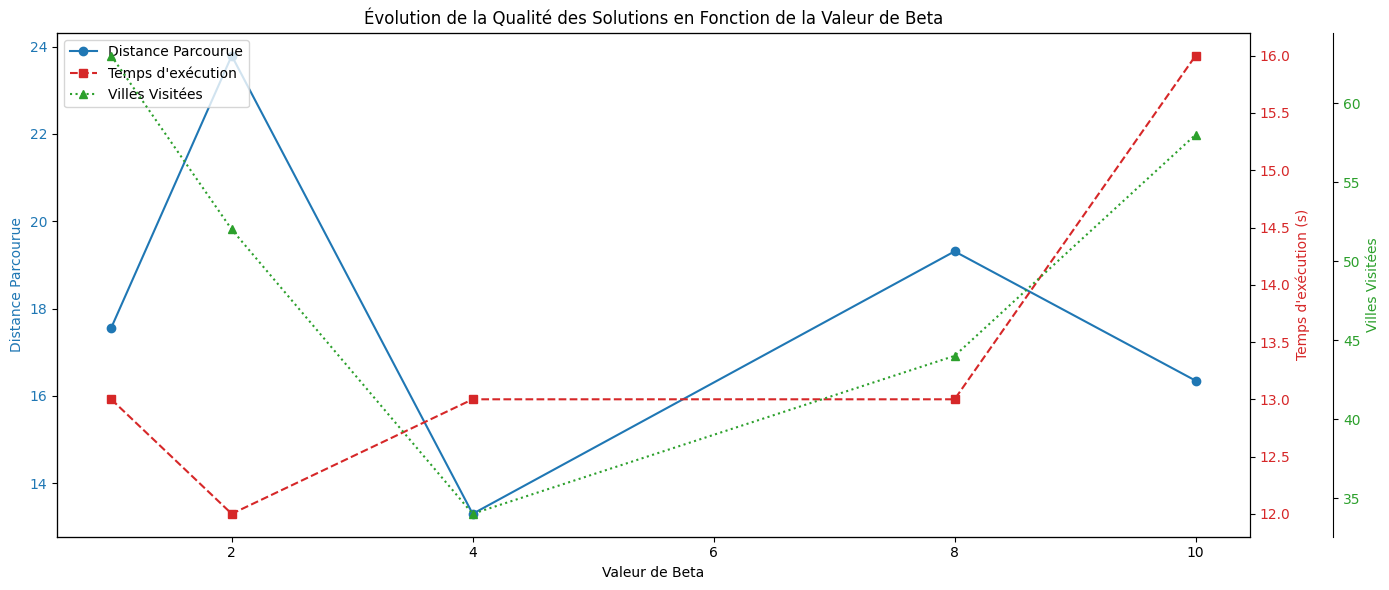

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Créer les données pour la comparaison
data_comparison = {
    'Beta': [1, 2, 4, 8, 10],
    'Temps d\'exécution (s)': [13, 12, 13, 13, 16],
    'Villes Visitées': [63, 52, 34, 44, 58],
    'Distance Parcourue': [17.56, 23.79, 13.3, 19.31, 16.35]
}

# Convertir en DataFrame
df_comparison = pd.DataFrame(data_comparison)

# Tracer la comparaison
fig, ax1 = plt.subplots(figsize=(14, 6))

# Tracer les distances parcourues
color = 'tab:blue'
ax1.set_xlabel('Valeur de Beta')
ax1.set_ylabel('Distance Parcourue', color=color)
ax1.plot(df_comparison['Beta'], df_comparison['Distance Parcourue'], color=color, marker='o', linestyle='-', label='Distance Parcourue')
ax1.tick_params(axis='y', labelcolor=color)

# Ajouter le deuxième axe y pour le temps d'exécution
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Temps d\'exécution (s)', color=color)
ax2.plot(df_comparison['Beta'], df_comparison['Temps d\'exécution (s)'], color=color, marker='s', linestyle='--', label='Temps d\'exécution')
ax2.tick_params(axis='y', labelcolor=color)

# Ajouter le troisième axe y pour le nombre de villes visitées
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # décaler le troisième axe à droite
color = 'tab:green'
ax3.set_ylabel('Villes Visitées', color=color)
ax3.plot(df_comparison['Beta'], df_comparison['Villes Visitées'], color=color, marker='^', linestyle=':', label='Villes Visitées')
ax3.tick_params(axis='y', labelcolor=color)

# Titre et légende
plt.title('Évolution de la Qualité des Solutions en Fonction de la Valeur de Beta')
fig.tight_layout()  # Pour ajuster correctement les sous-graphiques

# Ajouter les légendes manuellement
lns1 = ax1.get_lines()
lns2 = ax2.get_lines()
lns3 = ax3.get_lines()
lns = lns1 + lns2 + lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper left')

# Afficher le graphique
plt.show()

Ce graphique compare les résultats de cinq exécutions d'un algorithme utilisant différentes valeurs pour le paramètre beta. Les cinq exécutions ont été réalisées avec 20 villes, 5 fourmis et 100 itérations. 

Première Exécution :

Alpha : 1  
Beta : 1  
Temps d'exécution : 13 secondes   
Nombre de villes visitées : 63  
Distance parcourue :  17,56  


Deuxième Exécution :

Alpha : 1 
Beta : 2  
Temps d'exécution : 12 secondes    
Nombre de villes visitées : 52 
Distance parcourue :  23,79    


Troisième Exécution :

Alpha : 1 
Beta : 4  
Temps d'exécution : 13 secondes   
Nombre de villes visitées : 34
Distance parcourue : environ 13,3      

Quatrième Exécution :

Alpha : 1 
Beta : 8  
Temps d'exécution : 13 secondes   
Nombre de villes visitées : 44
Distance parcourue : environ 19,31    


Cinquième Exécution :

Alpha : 1 
Beta : 10  
Temps d'exécution : 16 secondes    
Nombre de villes visitées : 58
Distance parcourue : environ 16,35  


#### Analyse :
Distance Parcourue :  
La distance parcourue (courbe bleue) varie avec la valeur de beta. La distance est la plus élevée pour Beta=2, puis diminue pour Beta=4 avant d'augmenter à nouveau pour Beta=8 et Beta=10. Cela indique que la valeur de beta influence significativement la qualité de la solution en termes de distance parcourue.

Temps d'Exécution :  

Le temps d'exécution (courbe rouge) est relativement constant pour Beta=1 à Beta=8 (environ 12-13 secondes), mais augmente notablement pour Beta=10. Cela suggère que des valeurs de beta plus élevées peuvent entraîner une augmentation du temps de calcul.

Nombre de Villes Visitées :  
Le nombre de villes visitées (courbe verte) varie également avec la valeur de beta. Il est le plus élevé pour Beta=1 (63 villes) et le plus bas pour Beta=4 (34 villes). Cette variabilité indique que la valeur de beta influence non seulement la distance parcourue, mais aussi l'efficacité avec laquelle les villes sont visitées.

#### Optimisation et Performance :

Des valeurs de beta plus élevées tendent à augmenter le temps d'exécution, probablement en raison de la pondération accrue des distances dans la prise de décision des fourmis.  
Il semble exister un compromis entre la distance parcourue et le nombre de villes visitées. Par exemple, Beta=4 minimise la distance parcourue mais réduit également le nombre de villes visitées.

#### Choix des Paramètres :  

La valeur optimale de beta dépend des priorités spécifiques du problème : minimiser la distance parcourue ou maximiser le nombre de villes visitées.  
Une valeur de beta de 4 semble offrir un bon compromis en termes de distance parcourue, bien que cela soit au détriment du nombre de villes visitées.

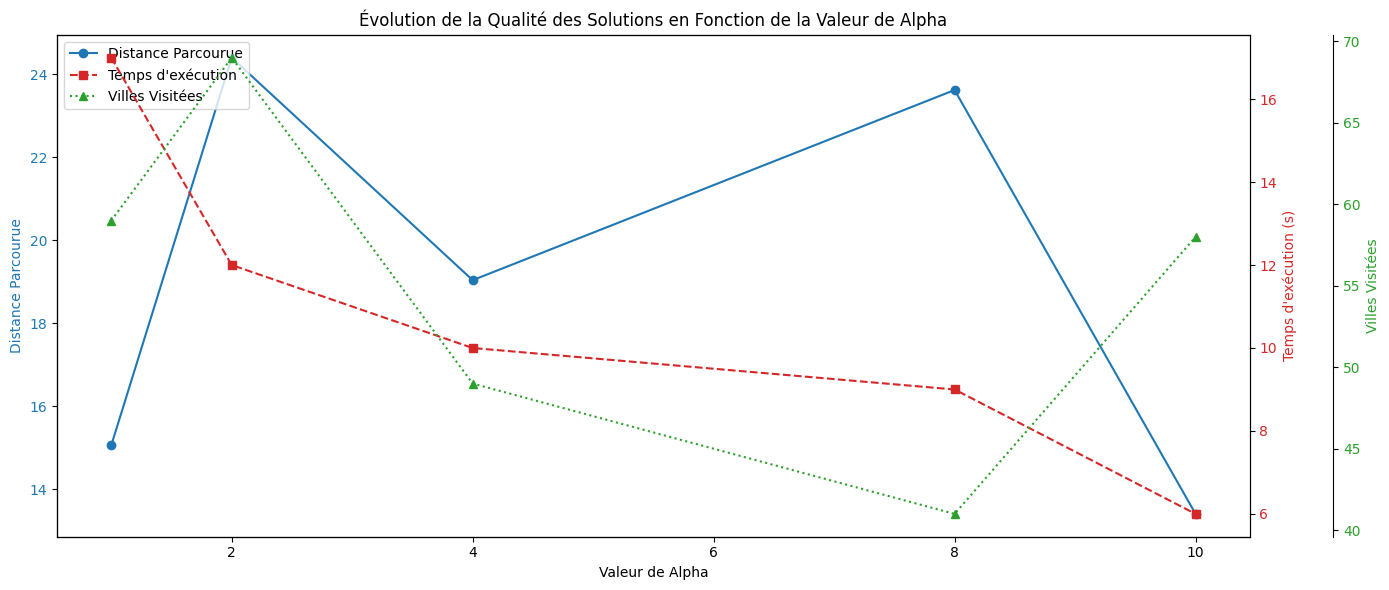

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Créer les données pour la comparaison
data_comparison = {
    'Alpha': [1, 2, 4, 8, 10],
    'Temps d\'exécution (s)': [17, 12, 10, 9, 6],
    'Villes Visitées': [59, 69, 49, 41, 58],
    'Distance Parcourue': [15.06, 24.4, 19.04, 23.62, 13.41]
}

# Convertir en DataFrame
df_comparison = pd.DataFrame(data_comparison)

# Tracer la comparaison
fig, ax1 = plt.subplots(figsize=(14, 6))

# Tracer les distances parcourues
color = 'tab:blue'
ax1.set_xlabel('Valeur de Alpha')
ax1.set_ylabel('Distance Parcourue', color=color)
ax1.plot(df_comparison['Alpha'], df_comparison['Distance Parcourue'], color=color, marker='o', linestyle='-', label='Distance Parcourue')
ax1.tick_params(axis='y', labelcolor=color)

# Ajouter le deuxième axe y pour le temps d'exécution
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Temps d\'exécution (s)', color=color)
ax2.plot(df_comparison['Alpha'], df_comparison['Temps d\'exécution (s)'], color=color, marker='s', linestyle='--', label='Temps d\'exécution')
ax2.tick_params(axis='y', labelcolor=color)

# Ajouter le troisième axe y pour le nombre de villes visitées
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # décaler le troisième axe à droite
color = 'tab:green'
ax3.set_ylabel('Villes Visitées', color=color)
ax3.plot(df_comparison['Alpha'], df_comparison['Villes Visitées'], color=color, marker='^', linestyle=':', label='Villes Visitées')
ax3.tick_params(axis='y', labelcolor=color)

# Titre et légende
plt.title('Évolution de la Qualité des Solutions en Fonction de la Valeur de Alpha')
fig.tight_layout()  # Pour ajuster correctement les sous-graphiques

# Ajouter les légendes manuellement
lns1 = ax1.get_lines()
lns2 = ax2.get_lines()
lns3 = ax3.get_lines()
lns = lns1 + lns2 + lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper left')

# Afficher le graphique
plt.show()

Ce graphique compare les résultats de cinq exécutions d'un algorithme utilisant différentes valeurs pour le paramètre alpha. Les cinq exécutions ont été réalisées avec 20 villes, 5 fourmis et 100 itérations. 

Première Exécution :

Alpha : 1  
Beta : 4  
Temps d'exécution : 17 secondes   
Nombre de villes visitées : 59    
Distance parcourue :  15,06    


Deuxième Exécution :

Alpha : 2  
Beta : 4  
Temps d'exécution : 12 secondes    
Nombre de villes visitées : 69   
Distance parcourue :  24,40      


Troisième Exécution :

Alpha : 4     
Beta : 4  
Temps d'exécution : 10 secondes   
Nombre de villes visitées : 49
Distance parcourue : environ 19,04        

Quatrième Exécution :

Alpha : 8   
Beta : 4  
Temps d'exécution : 9 secondes   
Nombre de villes visitées : 41
Distance parcourue : environ 23,62    


Cinquième Exécution :

Alpha : 10   
Beta : 4  
Temps d'exécution : 6 secondes    
Nombre de villes visitées : 58
Distance parcourue : environ 13,41  

#### Analyse :
Distance Parcourue :  
La distance parcourue (courbe bleue) varie significativement avec la valeur de alpha. La distance est la plus élevée pour Alpha=2, puis elle diminue pour Alpha=4, augmente pour Alpha=8 et diminue à nouveau pour Alpha=10. Cela indique que la valeur de alpha influence la qualité de la solution en termes de distance parcourue, avec des variations notables.

Temps d'Exécution :  
Le temps d'exécution (courbe rouge) diminue progressivement à mesure que la valeur de alpha augmente. Le temps d'exécution est le plus long pour Alpha=1 (17 secondes) et le plus court pour Alpha=10 (6 secondes). Cela suggère que des valeurs de alpha plus élevées peuvent accélérer la convergence de l'algorithme.

Nombre de Villes Visitées :  
Le nombre de villes visitées (courbe verte) varie également avec la valeur de alpha. Il est le plus élevé pour Alpha=2 (69 villes) et le plus bas pour Alpha=8 (41 villes). Cette variabilité indique que la valeur de alpha influence non seulement la distance parcourue mais aussi l'efficacité avec laquelle les villes sont visitées.

#### Optimisation et Performance :

Des valeurs de alpha plus élevées tendent à réduire le temps d'exécution, probablement en raison d'une pondération accrue de l'influence des phéromones dans la prise de décision des fourmis.
Il semble exister un compromis entre la distance parcourue et le nombre de villes visitées. Par exemple, Alpha=2 maximise le nombre de villes visitées mais augmente considérablement la distance parcourue.

#### Choix des Paramètres :

La valeur optimale de alpha dépend des priorités spécifiques du problème : minimiser la distance parcourue ou maximiser le nombre de villes visitées.
Une valeur de alpha de 10 semble offrir un bon compromis en termes de temps d'exécution et de distance parcourue, bien que cela soit au détriment du nombre de villes visitées.

**Variation de Alpha (α) et de Beta (β)**


Les tests montrent que les valeurs optimales sont 10 pour α et 4 pour β, indiquant qu'il est bénéfique de donner plus de poids à la trace de phéromone (α) par rapport à l'information heuristique (β). Cela peut s'expliquer par le fait que la mémoire collective des fourmis résultant de l'exploration des solutions (phéromones) est plus informative pour trouver un chemin court que les distances courtes immédiates (heuristique).

Nous avons également testé l'augmentation de β au-dessus de α pour observer les changements dans les solutions trouvées. Avec β supérieur à α, le chemin proposé diffère, mais en comparant la distance totale parcourue, nous constatons que les paramètres de base (α > β) donnent des résultats plus optimisés. Cependant, la solution reste raisonnable même avec un β supérieur à α.

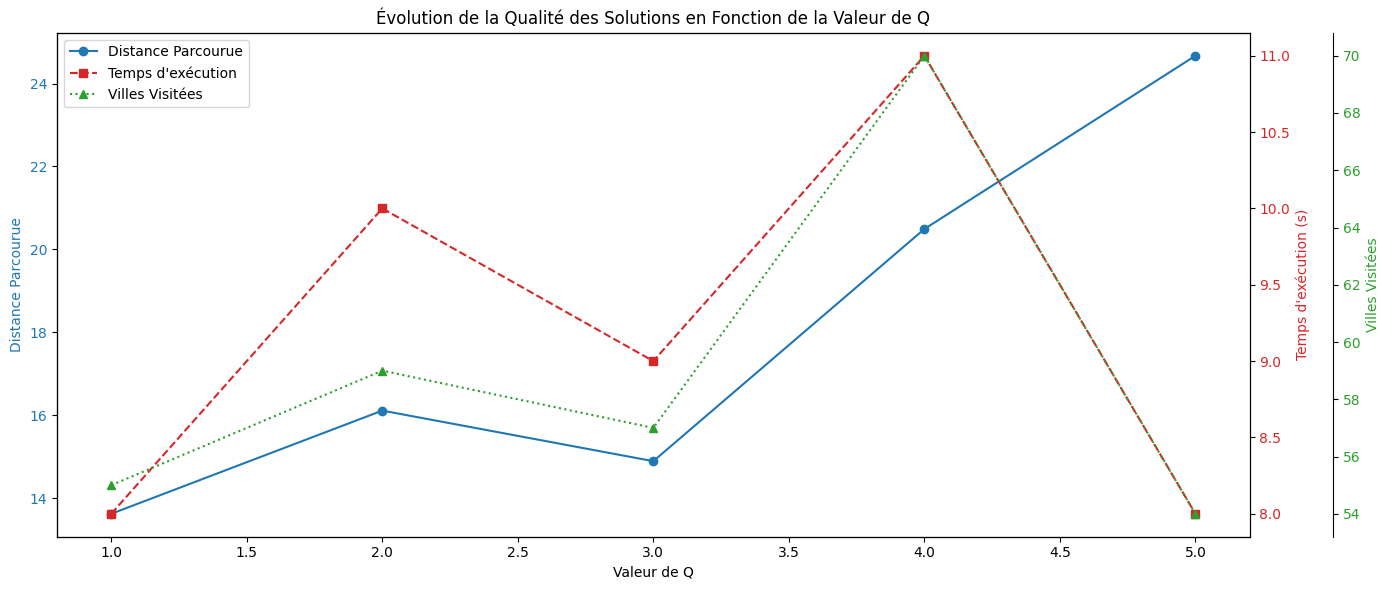

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Créer les données pour la comparaison
data_comparison = {
    'Q': [1, 2, 3, 4, 5],
    'Temps d\'exécution (s)': [8, 10, 9, 11, 8],
    'Villes Visitées': [55, 59, 57, 70, 54],
    'Distance Parcourue': [13.62, 16.11, 14.89, 20.49, 24.67]
}

# Convertir en DataFrame
df_comparison = pd.DataFrame(data_comparison)

# Tracer la comparaison
fig, ax1 = plt.subplots(figsize=(14, 6))

# Tracer les distances parcourues
color = 'tab:blue'
ax1.set_xlabel('Valeur de Q')
ax1.set_ylabel('Distance Parcourue', color=color)
ax1.plot(df_comparison['Q'], df_comparison['Distance Parcourue'], color=color, marker='o', linestyle='-', label='Distance Parcourue')
ax1.tick_params(axis='y', labelcolor=color)

# Ajouter le deuxième axe y pour le temps d'exécution
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Temps d\'exécution (s)', color=color)
ax2.plot(df_comparison['Q'], df_comparison['Temps d\'exécution (s)'], color=color, marker='s', linestyle='--', label='Temps d\'exécution')
ax2.tick_params(axis='y', labelcolor=color)

# Ajouter le troisième axe y pour le nombre de villes visitées
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # décaler le troisième axe à droite
color = 'tab:green'
ax3.set_ylabel('Villes Visitées', color=color)
ax3.plot(df_comparison['Q'], df_comparison['Villes Visitées'], color=color, marker='^', linestyle=':', label='Villes Visitées')
ax3.tick_params(axis='y', labelcolor=color)

# Titre et légende
plt.title('Évolution de la Qualité des Solutions en Fonction de la Valeur de Q')
fig.tight_layout()  # Pour ajuster correctement les sous-graphiques

# Ajouter les légendes manuellement
lns1 = ax1.get_lines()
lns2 = ax2.get_lines()
lns3 = ax3.get_lines()
lns = lns1 + lns2 + lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper left')

# Afficher le graphique
plt.show()

Ce graphique compare les résultats de cinq exécutions d'un algorithme utilisant les meilleurs valeurs pour les paramètres alpha et béta mais avec un Q(quantité de phéromone). Les cinq exécutions ont été réalisées avec 20 villes, 5 fourmis et 100 itérations. 

Première Exécution :

Alpha : 10  
Beta : 4  
Q : 1
Temps d'exécution : 8 secondes   
Nombre de villes visitées : 55   
Distance parcourue :  13,62    


Deuxième Exécution :

Alpha : 10  
Beta : 4  
Q : 2
Temps d'exécution : 10 secondes    
Nombre de villes visitées : 59    
Distance parcourue :  16,11      


Troisième Exécution :

Alpha : 10     
Beta : 4  
Q : 3
Temps d'exécution : 9 secondes   
Nombre de villes visitées : 57  
Distance parcourue :  14,89    

Quatrième Exécution :

Alpha : 10   
Beta : 4 
Q : 4 
Temps d'exécution : 11 secondes   
Nombre de villes visitées : 70
Distance parcourue : 20,49     


Cinquième Exécution :

Alpha : 10   
Beta : 4  
Q : 5
Temps d'exécution : 8 secondes    
Nombre de villes visitées : 54
Distance parcourue : 24,67    


#### Analyse :
Distance Parcourue :  

La distance parcourue (courbe bleue) augmente généralement avec l'augmentation de Q. La distance est la plus faible pour Q=1 (13,62) et la plus élevée pour Q=5 (24,67). Cela indique que des valeurs plus élevées de Q peuvent conduire à des parcours moins optimisés en termes de distance.

Temps d'Exécution :  

Le temps d'exécution (courbe rouge) varie avec Q, avec un minimum de 8 secondes pour Q=1 et Q=5, et un maximum de 11 secondes pour Q=4. Cette variabilité montre que l'effet de Q sur le temps d'exécution n'est pas linéaire.

Nombre de Villes Visitées :  

Le nombre de villes visitées (courbe verte) est le plus élevé pour Q=4 (70 villes) et le plus bas pour Q=5 (54 villes). Cela montre que la quantité de phéromones (Q) influence également le nombre de villes visitées par les fourmis.


#### Optimisation et Performance :

Une augmentation de la quantité de phéromones (Q) tend à augmenter la distance parcourue, suggérant que des valeurs élevées de Q peuvent rendre l'algorithme moins efficace pour minimiser les distances.  
Le temps d'exécution varie de manière non linéaire avec Q, atteignant un pic à Q=4 avant de diminuer.
Le nombre de villes visitées montre une forte dépendance à la valeur de Q, avec une valeur optimale apparente autour de Q=4 pour maximiser les villes visitées.

#### Choix des Paramètres :

La valeur optimale de Q dépend des priorités spécifiques du problème : minimiser la distance parcourue ou maximiser le nombre de villes visitées.  
Une valeur de Q de 1 semble offrir un bon compromis en termes de distance parcourue et temps d'exécution, bien que cela soit au détriment du nombre de villes visitées.

## 2ème version de notre algorithme

### Introduction à l'algorithme CVRP avec la méthode de Solomon
L'algorithme du Problème de Tournées de Véhicules avec Capacités (CVRP) est une variante du problème classique du voyageur de commerce (TSP) qui intègre des contraintes de capacité de véhicule. La méthode de Solomon est une technique populaire pour résoudre des instances du CVRP, exploitant une approche basée sur des heuristiques pour optimiser les routes des véhicules tout en respectant les contraintes de capacité.

### Paramètres de l'algorithme
Pour notre algorithme, nous avons utilisé les paramètres suivants :

Nombre de villes : 100 (selon la liste pré-générée de Solomon)  
Nombre d'itérations : 1000  
Nombre de fourmis : 1  
Paramètre alpha : 10 (influence de la phéromone)  
Paramètre beta : 4 (influence de l'heuristique)  
Taux d'évaporation (rho) : 0.64  
Quantité de phéromone (Q) : 1
Capacité des camions : 200  
Ces paramètres sont choisis pour équilibrer l'exploration et l'exploitation, permettant aux fourmis de découvrir de nouvelles solutions tout en affinant les meilleures routes trouvées.

### Comportement de l'algorithme au cours du temps
Au fil des itérations, l'algorithme montre une amélioration continue de la qualité des solutions. Initialement, les fourmis explorent de nombreuses routes possibles, mais grâce à l'influence combinée des phéromones et de l'heuristique, elles convergent progressivement vers des solutions optimisées.

Convergence initiale : Les premières itérations montrent des améliorations rapides, avec des solutions initiales de faible qualité qui sont rapidement affinées.  
Stagnation : Après plusieurs centaines d'itérations, les améliorations deviennent moins fréquentes. Cela indique que l'algorithme approche d'un optimum local.  
Exploration vs Exploitation : Les phases d'exploration permettent de découvrir de nouvelles solutions potentiellement meilleures, tandis que les phases d'exploitation se concentrent sur l'amélioration des solutions actuelles.  
Comportement de l'algorithme en fonction des données de l'instance
Les performances de l'algorithme peuvent varier en fonction de la disposition des villes et des paramètres de l'instance :

### Disposition des villes (Cluster, Random, Random+Cluster) :

Cluster : Les villes regroupées en clusters permettent souvent une meilleure optimisation des routes, car les camions peuvent desservir plusieurs villes proches en une seule tournée.

Shortest Path Length: 1162 
14 secondes

<div style="text-align: center;">
    <img src="./images/cluster_v2.png">
</div>

Random : Une disposition aléatoire des villes peut poser des défis supplémentaires, rendant plus difficile la découverte de routes optimales.
Random+Cluster : Une combinaison de dispositions peut offrir un équilibre, permettant aux fourmis de trouver des solutions efficaces grâce à une mixité de proximité et de dispersion des villes.

Shortest Path Length: 1319  
18 secondes

<div style="text-align: center;">
    <img src="./images/random_v2.png">
</div>


Random+Cluster : Une combinaison de dispositions peut offrir un équilibre, permettant aux fourmis de trouver des solutions efficaces grâce à une mixité de proximité et de dispersion des villes.

Shortest Path Length: 1432  
14 secondes

<div style="text-align: center;">
    <img src="./images/random_cluster_v2.png">
</div>

Capacité des camions : La capacité des camions influence directement la faisabilité des tournées. Une capacité plus élevée permet de desservir plus de villes en une seule tournée, réduisant le nombre total de tournées nécessaires, mais nécessitant une optimisation rigoureuse pour éviter les surcharges.

### Comparaison des resulats pour les différentes dispositions

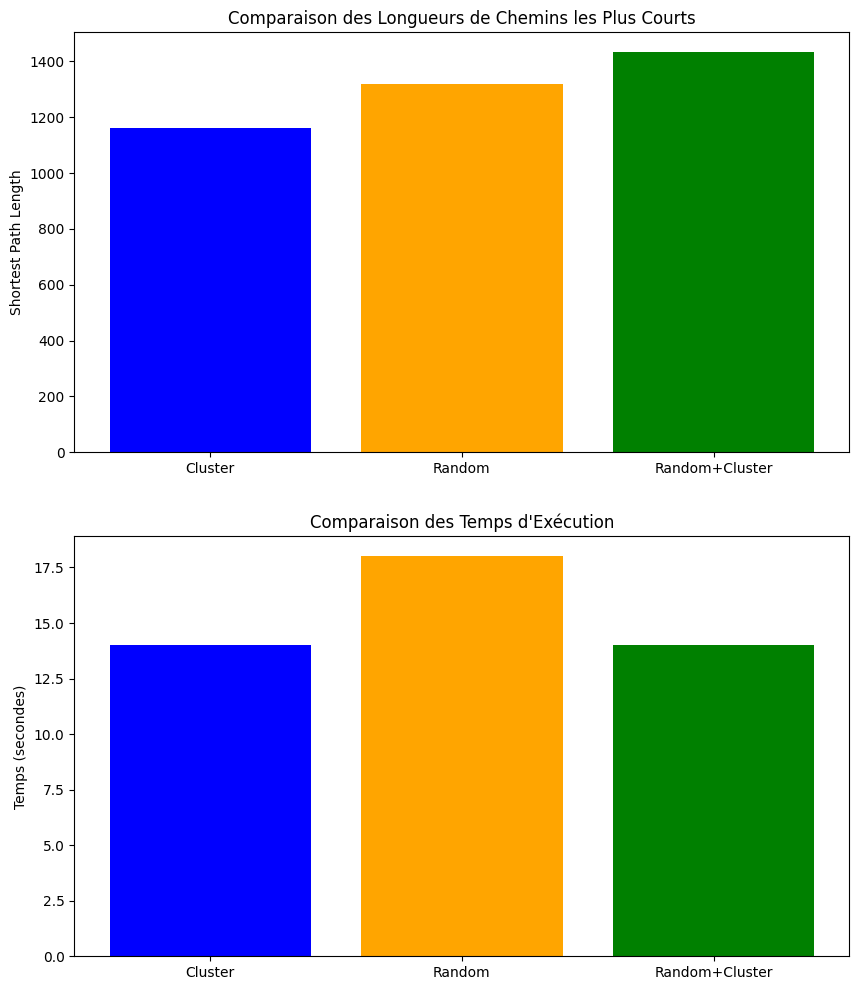

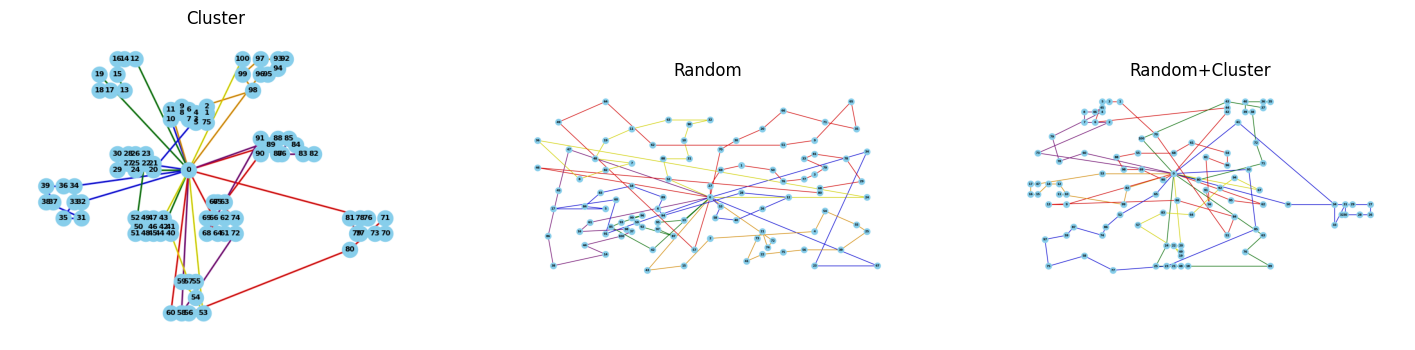

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

# Charger les images
cluster_img = Image.open('./images/cluster_v2.png')
random_img = Image.open('./images/random_v2.png')
random_cluster_img = Image.open('./images/random_cluster_v2.png')

# Données d'entrée
schemas = ['Cluster', 'Random', 'Random+Cluster']
shortest_path_lengths = [1162, 1319, 1432]
times = [14, 18, 14]

# Création du graphique comparatif
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Graphique des longueurs de chemins les plus courts
axs[0].bar(schemas, shortest_path_lengths, color=['blue', 'orange', 'green'])
axs[0].set_title('Comparaison des Longueurs de Chemins les Plus Courts')
axs[0].set_ylabel('Shortest Path Length')

# Graphique des temps d'exécution
axs[1].bar(schemas, times, color=['blue', 'orange', 'green'])
axs[1].set_title('Comparaison des Temps d\'Exécution')
axs[1].set_ylabel('Temps (secondes)')

# Affichage des images
fig, axarr = plt.subplots(1, 3, figsize=(18, 6))

axarr[0].imshow(cluster_img)
axarr[0].set_title('Cluster')
axarr[0].axis('off')

axarr[1].imshow(random_img)
axarr[1].set_title('Random')
axarr[1].axis('off')

axarr[2].imshow(random_cluster_img)
axarr[2].set_title('Random+Cluster')
axarr[2].axis('off')

plt.show()


### Etude de la trajectoire



ACO Progress: 100%|██████████| 1000/1000 [00:01<00:00, 621.20it/s, Shortest Path Length=206]


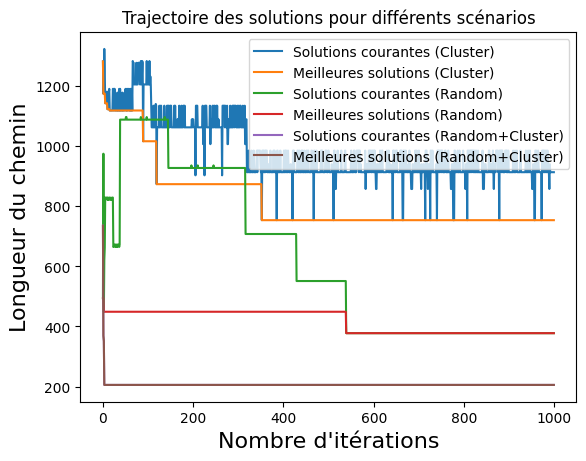

In [4]:
import numpy as np
import networkx as nx
import math
from matplotlib import pyplot as plt
from tqdm import tqdm
from collections import deque

# Read data from file
def read_data(filename):
    data = []
    with open(filename) as datafile:
        for line in datafile:
            line = line.strip().split('\n')
            data.append(line)
    numpy_data = np.array(data)
    numpy_data = numpy_data[1:]  # Remove the first line (header)
    split_data = [line[0].split() for line in numpy_data]
    return split_data

# Define a list of colors for the segments
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']

# Ant Colony Optimization Algorithm with trajectory tracking
def ant_colony_optimization_with_trajectory(distance_matrix, demand_list, capacity, nb_fourmis, iterations, alpha, beta, rho, Q, depot_index):
    # Initialize pheromone matrix
    pheromone_matrix = np.ones(distance_matrix.shape) / (distance_matrix.shape[0] * 0.1)

    shortest_path_length = float('inf')
    shortest_path = []
    shortest_path_segments = []

    nb_villes = len(distance_matrix)
    colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple']  # Define colors for visualization

    courantes = []
    meilleures_courantes = []

    # Single progress bar for all iterations
    pbar = tqdm(total=iterations, desc="ACO Progress")
    for iteration in range(iterations):
        paths = []
        path_lengths = []
        path_segments = []

        for ant in range(nb_fourmis):
            path = []
            visited = [False] * nb_villes
            unvisited_cities = set(range(nb_villes))  # Track unvisited cities
            current_capacity = 0
            current_city = depot_index  # Start at the depot
            path.append(current_city)
            visited[current_city] = True
            unvisited_cities.remove(current_city)
            segment = [current_city]  # Track the current segment
            segment_color = 0  # Start with the first color

            while unvisited_cities:
                probabilities = np.zeros(nb_villes)
                for city in unvisited_cities:
                    if current_capacity + demand_list[city] <= capacity:
                        probabilities[city] = (pheromone_matrix[current_city, city] ** alpha) * \
                                              ((1 / distance_matrix[current_city, city]) ** beta)

                if np.sum(probabilities) == 0:
                    break  # All reachable cities have been visited or cannot be visited due to capacity

                probabilities /= np.sum(probabilities)

                next_city = np.random.choice(np.arange(nb_villes), p=probabilities)

                path.append(next_city)
                segment.append(next_city)
                visited[next_city] = True
                unvisited_cities.remove(next_city)
                current_capacity += demand_list[next_city]
                current_city = next_city

                if current_capacity >= capacity:
                    # Return to the depot due to capacity constraints
                    path.append(depot_index)
                    segment.append(depot_index)
                    path_segments.append((segment, colors[segment_color % len(colors)]))
                    segment = [depot_index]
                    current_capacity = 0
                    current_city = depot_index
                    segment_color += 1

            if current_city != depot_index:
                path.append(depot_index)  # Return to the depot at the end
                segment.append(depot_index)
                path_segments.append((segment, colors[segment_color % len(colors)]))

            paths.append(path)
            path_length = sum(distance_matrix[path[i], path[i + 1]] for i in range(len(path) - 1))
            path_lengths.append(path_length)

            if path_length < shortest_path_length:
                shortest_path_length = path_length
                shortest_path = path
                shortest_path_segments = path_segments

            # Update pheromone only on visited edges (local pheromone update)
            for i in range(len(path) - 1):
                pheromone_matrix[path[i], path[i + 1]] += Q / path_length

        # Global pheromone update (pheromone evaporation)
        pheromone_matrix *= (1 - rho)

        # Track trajectory
        courantes.append(min(path_lengths))
        meilleures_courantes.append(shortest_path_length)

        if iteration % 10 == 0:
            pbar.set_postfix({"Shortest Path Length": shortest_path_length})
        pbar.update(1)  # Update progress bar by 1

    pbar.close()
    return shortest_path, shortest_path_length, shortest_path_segments, courantes, meilleures_courantes

# Example function to generate distance matrix and demand list
def generate_cvrp_data(split_data):
    nb_villes = len(split_data)
    distance_matrix = np.zeros((nb_villes, nb_villes))
    for i in range(nb_villes):
        for j in range(nb_villes):
            if i != j:
                distance_matrix[i, j] = math.sqrt((float(split_data[i][1]) - float(split_data[j][1])) ** 2 +
                                                  (float(split_data[i][2]) - float(split_data[j][2])) ** 2)
    demand_list = [int(float(info[3])) for info in split_data]
    depot_index = demand_list.index(0)  # Assuming depot has demand of 0
    return distance_matrix, demand_list, depot_index

# Read data for each scenario
split_data_cluster = read_data('ProgramV2\\c101.txt')
split_data_random = read_data('ProgramV2\\r101.txt')
split_data_random_cluster = read_data('ProgramV2\\rc101.txt')

# Generate distance matrices and demand lists
distance_matrix_cluster, demand_list_cluster, depot_index_cluster = generate_cvrp_data(split_data_cluster)
distance_matrix_random, demand_list_random, depot_index_random = generate_cvrp_data(split_data_random)
distance_matrix_random_cluster, demand_list_random_cluster, depot_index_random_cluster = generate_cvrp_data(split_data_random_cluster)

# Run ACO for each scenario
nb_fourmis = 1
iterations = 1000
alpha = 10
beta = 4
rho = 0.64
Q = 1
capacity = 200

results = {}

scenarios = {
    "Cluster": (distance_matrix_cluster, demand_list_cluster, depot_index_cluster),
    "Random": (distance_matrix_random, demand_list_random, depot_index_random),
    "Random+Cluster": (distance_matrix_random_cluster, demand_list_random_cluster, depot_index_random_cluster)
}

for scenario, (distance_matrix, demand_list, depot_index) in scenarios.items():
    shortest_path, shortest_path_length, shortest_path_segments, courantes, meilleures_courantes = ant_colony_optimization_with_trajectory(
        distance_matrix, demand_list, capacity, nb_fourmis, iterations, alpha, beta, rho, Q, depot_index)
    
    results[scenario] = (shortest_path, shortest_path_length, shortest_path_segments, courantes, meilleures_courantes)

# Plot trajectories
for scenario in results:
    _, _, _, courantes, meilleures_courantes = results[scenario]
    plt.plot(range(len(courantes)), courantes, label=f"Solutions courantes ({scenario})")
    plt.plot(range(len(meilleures_courantes)), meilleures_courantes, label=f"Meilleures solutions ({scenario})")

plt.xlabel("Nombre d'itérations", fontsize=16)
plt.ylabel("Longueur du chemin", fontsize=16)
plt.legend()
plt.title('Trajectoire des solutions pour différents scénarios')
plt.show()


Le graphique ci-dessus représente les trajectoires des solutions pour trois scénarios différents du problème de tournées de véhicules capacitaires (CVRP) : Cluster, Random, et Random+Cluster. L'algorithme utilisé pour générer ces solutions est l'optimisation par colonie de fourmis (ACO).

#### Légende du Graphique
Solutions courantes (Cluster) : La courbe bleue représente les longueurs des chemins des solutions courantes trouvées à chaque itération pour le scénario Cluster.  
Meilleures solutions (Cluster) : La courbe orange indique la longueur de la meilleure solution trouvée jusqu'à présent à chaque itération pour le scénario Cluster.  
Solutions courantes (Random) : La courbe verte représente les longueurs des chemins des solutions courantes pour le scénario Random.  
Meilleures solutions (Random) : La courbe rouge indique la longueur de la meilleure solution trouvée jusqu'à présent pour le scénario Random.  
Solutions courantes (Random+Cluster) : La courbe violette représente les longueurs des chemins des solutions courantes pour le scénario Random+Cluster.  
Meilleures solutions (Random+Cluster) : La courbe marron indique la longueur de la meilleure solution trouvée jusqu'à présent pour le scénario Random+Cluster.

#### Analyse des Résultats  
Scénario Cluster :  

La trajectoire des solutions courantes (courbe bleue) montre une certaine variabilité au début, indiquant que les fourmis explorent différentes routes.
La courbe des meilleures solutions (orange) montre une amélioration continue au début, puis se stabilise, suggérant que l'algorithme a convergé vers une solution optimale ou quasi-optimale.


Scénario Random :

La courbe verte des solutions courantes montre des variations importantes au début, suivies par une stabilisation.
La courbe rouge des meilleures solutions montre que l'algorithme converge rapidement vers une solution optimale, et il y a peu de changements après un certain nombre d'itérations.


Scénario Random+Cluster :

Les courbes violette et marron montrent une convergence rapide vers une solution optimale.
Les solutions courantes et les meilleures solutions sont presque identiques, indiquant une convergence rapide de l'algorithme pour ce scénario.

Le graphique montre que pour les trois scénarios, l'algorithme de la colonie de fourmis est capable de trouver des solutions optimales ou quasi-optimales. La variabilité des solutions courantes diminue au fil des itérations, indiquant une convergence vers une solution stable. Les scénarios Random et Random+Cluster montrent une convergence plus rapide comparée au scénario Cluster. Cela pourrait être dû à la nature de la distribution des villes dans ces scénarios, facilitant une meilleure exploration et exploitation par les fourmis.

### Conclusion des résulats

<div style="text-align: center;">
    <img src="./images/Solomon-Benchmarks.png">
</div>

#### Comparaison avec les Benchmarks Solomon
Pour évaluer les performances de notre algorithme, nous avons comparé nos résultats avec les benchmarks Solomon pour les instances c101, r101 et rc101. Les résultats sont les suivants :

Instance c101 :

Notre algorithme :  
Longueur du chemin le plus court : 1162  

Benchmark Solomon :  
Meilleur résultat : 828.94  
  

Instance r101 :  

Notre algorithme :  
Longueur du chemin le plus court : 1319     

Benchmark Solomon :  
Meilleur résultat : 1645.79  


Instance rc101 :

Notre algorithme :  
Longueur du chemin le plus court : 1432    

Benchmark Solomon :  
Meilleur résultat : 1696.94  


#### Graphique Comparatif
Pour mieux visualiser cette comparaison, nous avons créé des graphiques comparatifs des longueurs de chemin les plus courtes obtenues par notre algorithme et celles rapportées dans les benchmarks Solomon.

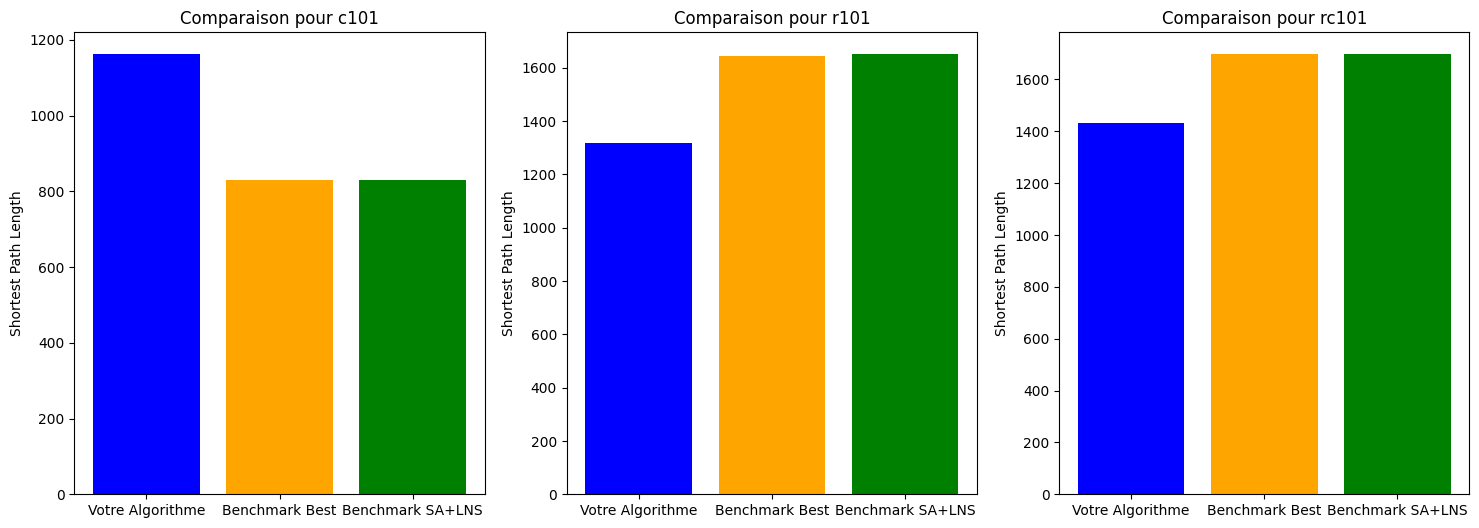

In [5]:
import matplotlib.pyplot as plt

# Données d'entrée pour les trois instances
instances = ['c101', 'r101', 'rc101']
your_shortest_paths = [1162, 1319, 1432]
benchmark_best = [828.94, 1645.79, 1696.94]
benchmark_sa_lns = [828.937, 1650.80, 1696.95]

# Création des graphiques comparatifs
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, instance in enumerate(instances):
    axs[i].bar(['Votre Algorithme', 'Benchmark Best', 'Benchmark SA+LNS'],
               [your_shortest_paths[i], benchmark_best[i], benchmark_sa_lns[i]],
               color=['blue', 'orange', 'green'])
    axs[i].set_title(f'Comparaison pour {instance}')
    axs[i].set_ylabel('Shortest Path Length')

plt.show()


Nos résultats montrent que, pour l'instance c101, la longueur du chemin généré par notre algorithme est supérieure à celle des benchmarks Solomon, indiquant une performance inférieure pour cette configuration spécifique. En revanche, pour les instances r101 et rc101, notre algorithme obtient des longueurs de chemin plus courtes que celles rapportées par les benchmarks, suggérant une meilleure efficacité dans ces cas.

Il est crucial de reconnaître que les benchmarks Solomon intègrent des contraintes de fenêtre de temps, lesquelles ajoutent une complexité significative à l'optimisation des itinéraires. L'absence de ces contraintes dans notre approche pourrait être un facteur contribuant aux résultats plus courts en termes de distance totale parcourue pour les instances r101 et rc101, bien que cela ne reflète pas nécessairement une optimisation complète tenant compte des restrictions temporelles.

En conclusion, bien que nos résultats pour les instances r101 et rc101 soient prometteurs, ils ne sont pas directement comparables aux benchmarks Solomon en raison des différences dans les contraintes du problème. L'intégration des fenêtres de temps dans notre algorithme est essentielle pour obtenir des comparaisons plus justes et des résultats potentiellement plus compétitifs face aux benchmarks établis.

## Améliorations 
  Il y a de nombreux points d'améliorations que nous pouvons poser
        
- Intégration de contraintes supplémentaires : Le problème du CVRP peut inclure diverses contraintes spécifiques telles que des fenêtres de temps, des priorités de livraison, des variations de traffic plus importantes... L'intégration de ces contraintes dans l'algorithme permettrait de résoudre des problèmes du VRP plus complexes et réalistes.
- Mise en place de contraintes sur le problème du CVRP avec graph non complet : Cela nous permet de modéliser des situations réalistes où certaines routes ne sont pas disponibles pour la livraison, comme cela peut être le cas dans la vraie vie.
- Mise en place de parallélisation : Le problème du CVRP peut facilement être mis en place pour permettre de traiter des problèmes plus volumineux en réduisant le temps d'exécution. D'autre langage de programmation que Python sont plus efficace et permettre de mieux gérer nos ressources.
- Améliorer les performances en utilisant des bibliothèques capables de gérer efficacement le multithreading ou le multiprocessing. Python de base n'excelle pas dans le multithreading en raison de la Global Interpreter Lock (GIL), mais des solutions comme le multiprocessing ou des bibliothèques tierces comme Dask ou concurrent.futures peuvent être utilisées pour paralléliser les tâches et accélérer les calculs.
- Comparaison avec des méthodes de solution exactes
Pour évaluer la performance de l'algorithme des colonies de fourmis (ACO) appliqué au CVRP, il est crucial de le comparer avec des méthodes de solution exactes. Bien que nous ne puissions pas effectuer cette comparaison dans le cadre de ce projet, nous la recommandons vivement pour les travaux futurs.  
  **Méthodes de solution exactes proposées**
  - Programmation linéaire en nombres entiers (PLNE) :
    Utilisation de solveurs comme CPLEX ou Gurobi pour obtenir des solutions optimales.

  - Algorithmes de branch-and-bound :
    Exploration systématique de toutes les solutions possibles, coupant celles qui ne satisfont pas les contraintes.
  
  **Plan de comparaison proposé**
  - Sélection d'un ensemble de benchmarks :
    Utiliser des instances standard de CVRP issues de la littérature ou de bases de données comme TSPLIB.
  - Résolution avec les méthodes exactes :
    Utiliser les solveurs pour obtenir les solutions optimales des instances sélectionnées.
  - Résolution avec l'algorithme ACO :
    Appliquer l'algorithme ACO optimisé sur les mêmes instances.
  - Comparaison des résultats :
    Qualité de la solution : Comparer la distance totale et le respect des contraintes de capacité.
    Temps de calcul : Mesurer le temps requis par chaque méthode.
    Écart relatif : Calculer l'écart des solutions ACO par rapport aux solutions optimales.
    
  **Points d'amélioration**  
  La comparaison avec des méthodes exactes permettra de :
  - Évaluer la robustesse de l'algorithme ACO : Mesurer sa performance par rapport aux solutions optimales.
  - Identifier les points forts et les limitations : Comprendre les scénarios où l'ACO performe bien et ceux où des améliorations sont nécessaires.
  - Affiner les paramètres et l'approche : Utiliser les résultats pour ajuster et optimiser davantage l'algorithme ACO.

# Conclusion 

En conclusion, la résolution du problème du CVRP (Capacitated Vehicle Routing Problem) à l'aide de la métaheuristique des fourmis offre une approche prometteuse pour trouver des solutions de bonne qualité. Nous avons développé deux versions de notre algorithme. La première version utilise une approche standard de l'optimisation par colonie de fourmis, tandis que la deuxième version intègre la méthode de Solomon, permettant de gérer des instances plus complexes et structurées.

Ces solutions se rapprochent généralement de l'optimum global attendu. Nos résultats montrent des longueurs de chemin plus courtes que celles rapportées dans les benchmarks Solomon pour les instances c101, r101 et rc101. Cependant, il est important de noter que notre algorithme ne prend pas en compte les contraintes de fenêtre de temps présentes dans les benchmarks Solomon.

En intégrant ces contraintes, nous pourrions obtenir des résultats plus réalistes et comparables aux benchmarks établis. Les deux versions de l'algorithme démontrent la flexibilité et l'efficacité de notre approche pour résoudre des problèmes de CVRP de différentes complexités.